# simple visualisation of crimes against kids in India in different states

importing libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import sys
import plotly.express as px

Reading files

In [6]:
crime = pd.read_csv(r'C:\Users\ADMIN\Downloads\crime_against_children.csv',index_col=False)
kidnaping = pd.read_csv(r'C:\Users\ADMIN\Downloads\kidnaping.csv',index_col=False)

In [ ]:
#observing both the tables and we can join them to find statistics

In [7]:
crime.head()

,S.No,State/UT,Name,2019,2020,2021,midPopulation,RateofCrimeAgainstChildren,ChargesSheetingRate
0,1,State,Andhra Pradesh,2524,2648,2669,151.1,17.7,93.2
1,2,State,Arunachal Pradesh,153,113,162,5.9,27.5,69.6
2,3,State,Assam,6608,4622,5282,120.8,43.7,56.0
3,4,State,Bihar,9320,6591,6894,475.0,14.5,68.9
4,5,State,Chhattisgarh,5665,5056,6001,97.5,61.6,70.4


In [8]:
kidnaping.head()

,S.No,State/UT,Name,2019,2020,2021,midPopulation,RateofKidnappingAbduction,ChargesSheetingRate
0,1,State,Andhra Pradesh,902,737,835,528.5,1.6,71.8
1,2,State,Arunachal Pradesh,117,78,85,15.4,5.5,37.3
2,3,State,Assam,9432,6934,7580,351.6,21.6,30.3
3,4,State,Bihar,10707,7889,10198,1237.0,8.2,53.8
4,5,State,Chhattisgarh,2638,2008,2681,296.1,9.1,36.7


In [7]:
kidnaping.shape

(36, 9)

In [8]:
crime.shape

(36, 9)

In [9]:
crime_kid = crime.merge(kidnaping,on='Name',suffixes=('_crime','_kidnaping'))

In [12]:
crime_kid[:30]

,S.No_crime,State/UT_crime,Name,2019_crime,2020_crime,2021_crime,midPopulation_crime,RateofCrimeAgainstChildren,ChargesSheetingRate_crime,S.No_kidnaping,State/UT_kidnaping,2019_kidnaping,2020_kidnaping,2021_kidnaping,midPopulation_kidnaping,RateofKidnappingAbduction,ChargesSheetingRate_kidnaping
0,1,State,Andhra Pradesh,2524,2648,2669,151.1,17.7,93.2,1,State,902,737,835,528.5,1.6,71.8
1,2,State,Arunachal Pradesh,153,113,162,5.9,27.5,69.6,2,State,117,78,85,15.4,5.5,37.3
2,3,State,Assam,6608,4622,5282,120.8,43.7,56.0,3,State,9432,6934,7580,351.6,21.6,30.3
3,4,State,Bihar,9320,6591,6894,475.0,14.5,68.9,4,State,10707,7889,10198,1237.0,8.2,53.8
4,5,State,Chhattisgarh,5665,5056,6001,97.5,61.6,70.4,5,State,2638,2008,2681,296.1,9.1,36.7
5,6,State,Goa,167,125,151,3.8,39.5,70.9,6,State,71,45,52,15.6,3.3,32.7
6,7,State,Gujarat,4685,4075,4515,209.2,21.6,79.2,7,State,1813,1198,1621,700.8,2.3,52.4
7,8,State,Haryana,5119,4338,5700,91.2,62.5,44.0,8,State,4023,2949,3554,296.0,12.0,18.0
8,9,State,Himachal Pradesh,748,636,740,21.5,34.4,53.0,9,State,455,343,430,74.1,5.8,20.4
9,10,State,Jharkhand,1674,1795,1867,138.4,13.5,83.7,10,State,1814,1564,1767,386.4,4.6,69.6


In [11]:
crime_kid.shape

(34, 17)

In [12]:
crime_kid.columns

Index(['S.No_crime', 'State/UT_crime', 'Name', '2019_crime', '2020_crime',
       '2021_crime', 'midPopulation_crime', 'RateofCrimeAgainstChildren',
       'ChargesSheetingRate_crime', 'S.No_kidnaping', 'State/UT_kidnaping',
       '2019_kidnaping', '2020_kidnaping', '2021_kidnaping',
       'midPopulation_kidnaping', 'RateofKidnappingAbduction',
       'ChargesSheetingRate_kidnaping'],
      dtype='object')

looking for null values

In [49]:
crime_kid.isna().any().sum()

0

lets observe basic statisics

In [13]:
crime_kid.describe()

,S.No_crime,2020_crime,2021_crime,midPopulation_crime,RateofCrimeAgainstChildren,ChargesSheetingRate_crime,S.No_kidnaping,2020_kidnaping,2021_kidnaping,midPopulation_kidnaping,RateofKidnappingAbduction,ChargesSheetingRate_kidnaping
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,17.617647,3762.441176,4369.352941,129.164706,43.270588,71.191176,17.617647,2468.735294,2961.470588,398.076471,6.558824,35.229412
std,10.162363,4570.067768,5188.883163,176.058728,27.342292,17.030941,10.162363,3386.358707,3947.475037,500.817011,5.741772,22.020287
min,1.000000,9.000000,17.000000,0.200000,6.200000,32.100000,1.000000,1.000000,0.000000,0.700000,0.000000,0.000000
25%,9.250000,143.250000,153.750000,6.475000,27.275000,57.475000,9.250000,78.750000,85.000000,17.350000,2.550000,18.600000
50%,17.500000,2384.500000,2612.500000,89.300000,34.650000,74.200000,17.500000,766.500000,828.000000,296.050000,5.650000,31.550000
75%,25.750000,5285.500000,6686.500000,182.900000,54.625000,83.300000,25.750000,3783.750000,5033.750000,634.550000,8.475000,50.750000
max,36.000000,17008.000000,19173.000000,853.300000,128.500000,95.200000,36.000000,12913.000000,14554.000000,2317.000000,26.700000,92.800000


In [44]:
crime_kid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   S.No_crime                     34 non-null     int64  
 1   State/UT_crime                 34 non-null     object 
 2   Name                           34 non-null     object 
 3   2019_crime                     34 non-null     object 
 4   2020_crime                     34 non-null     int64  
 5   2021_crime                     34 non-null     int64  
 6   midPopulation_crime            34 non-null     float64
 7   RateofCrimeAgainstChildren     34 non-null     float64
 8   ChargesSheetingRate_crime      34 non-null     float64
 9   S.No_kidnaping                 34 non-null     int64  
 10  State/UT_kidnaping             34 non-null     object 
 11  2019_kidnaping                 34 non-null     object 
 12  2020_kidnaping                 34 non-null     int64

In [45]:
### from above we can see 2019_crime and 2019_kidnapping are object data type so first we convert it into int64

In [46]:
crime_kid['2019_kidnaping']=crime_kid['2019_kidnaping'].astype('int64')

In [47]:
crime_kid['2019_crime']=crime_kid['2019_crime'].astype('int64')

In [48]:
crime_kid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   S.No_crime                     34 non-null     int64  
 1   State/UT_crime                 34 non-null     object 
 2   Name                           34 non-null     object 
 3   2019_crime                     34 non-null     int64  
 4   2020_crime                     34 non-null     int64  
 5   2021_crime                     34 non-null     int64  
 6   midPopulation_crime            34 non-null     float64
 7   RateofCrimeAgainstChildren     34 non-null     float64
 8   ChargesSheetingRate_crime      34 non-null     float64
 9   S.No_kidnaping                 34 non-null     int64  
 10  State/UT_kidnaping             34 non-null     object 
 11  2019_kidnaping                 34 non-null     int64  
 12  2020_kidnaping                 34 non-null     int64

In [90]:
crime_kid["2019_crime"]=crime_kid["2019_crime"].astype('int64')

In [91]:
crime_kid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   S.No_crime                     34 non-null     int64  
 1   State/UT_crime                 34 non-null     object 
 2   Name                           34 non-null     object 
 3   2019_crime                     34 non-null     int64  
 4   2020_crime                     34 non-null     int64  
 5   2021_crime                     34 non-null     int64  
 6   midPopulation_crime            34 non-null     float64
 7   RateofCrimeAgainstChildren     34 non-null     float64
 8   ChargesSheetingRate_crime      34 non-null     float64
 9   S.No_kidnaping                 34 non-null     int64  
 10  State/UT_kidnaping             34 non-null     object 
 11  2019_kidnaping                 34 non-null     object 
 12  2020_kidnaping                 34 non-null     int64

In [86]:
crime_kid.describe()

,S.No_crime,2020_crime,2021_crime,midPopulation_crime,RateofCrimeAgainstChildren,ChargesSheetingRate_crime,S.No_kidnaping,2020_kidnaping,2021_kidnaping,midPopulation_kidnaping,RateofKidnappingAbduction,ChargesSheetingRate_kidnaping
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,17.617647,3762.441176,4369.352941,129.164706,43.270588,71.191176,17.617647,2468.735294,2961.470588,398.076471,6.558824,35.229412
std,10.162363,4570.067768,5188.883163,176.058728,27.342292,17.030941,10.162363,3386.358707,3947.475037,500.817011,5.741772,22.020287
min,1.000000,9.000000,17.000000,0.200000,6.200000,32.100000,1.000000,1.000000,0.000000,0.700000,0.000000,0.000000
25%,9.250000,143.250000,153.750000,6.475000,27.275000,57.475000,9.250000,78.750000,85.000000,17.350000,2.550000,18.600000
50%,17.500000,2384.500000,2612.500000,89.300000,34.650000,74.200000,17.500000,766.500000,828.000000,296.050000,5.650000,31.550000
75%,25.750000,5285.500000,6686.500000,182.900000,54.625000,83.300000,25.750000,3783.750000,5033.750000,634.550000,8.475000,50.750000
max,36.000000,17008.000000,19173.000000,853.300000,128.500000,95.200000,36.000000,12913.000000,14554.000000,2317.000000,26.700000,92.800000


In [20]:
crime_kid = crime_kid.drop(['S.No_crime','S.No_kidnaping'],axis=1)

In [57]:
crime_kid.head()

,State/UT_crime,Name,2019_crime,2020_crime,2021_crime,midPopulation_crime,RateofCrimeAgainstChildren,ChargesSheetingRate_crime,State/UT_kidnaping,2019_kidnaping,2020_kidnaping,2021_kidnaping,midPopulation_kidnaping,RateofKidnappingAbduction,ChargesSheetingRate_kidnaping
0,State,Andhra Pradesh,2524,2648,2669,151.1,17.7,93.2,State,902,737,835,528.5,1.6,71.8
1,State,Arunachal Pradesh,153,113,162,5.9,27.5,69.6,State,117,78,85,15.4,5.5,37.3
2,State,Assam,6608,4622,5282,120.8,43.7,56.0,State,9432,6934,7580,351.6,21.6,30.3
3,State,Bihar,9320,6591,6894,475.0,14.5,68.9,State,10707,7889,10198,1237.0,8.2,53.8
4,State,Chhattisgarh,5665,5056,6001,97.5,61.6,70.4,State,2638,2008,2681,296.1,9.1,36.7


In [40]:
## plotting some visuals to get a clear idea

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5632\610373915.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(crime_kid['Name'],rotation=90)


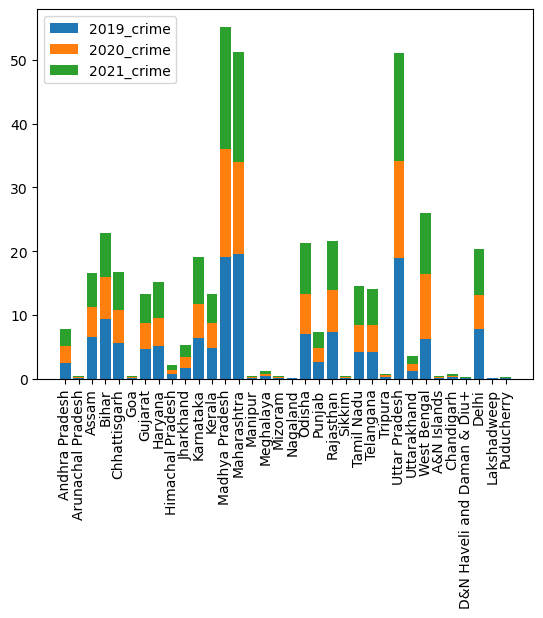

In [104]:
fig,ax = plt.subplots()
ax.bar(crime_kid['Name'],crime_kid['2019_crime']/1000,label='2019_crime')
ax.bar(crime_kid['Name'],crime_kid['2020_crime']/1000,bottom =crime_kid['2019_crime']/1000,label='2020_crime')
ax.bar(crime_kid['Name'],crime_kid['2021_crime']/1000,bottom =crime_kid['2019_crime']/1000+crime_kid['2020_crime']/1000,label='2021_crime')
ax.set_xticklabels(crime_kid['Name'],rotation=90)
ax.legend()
plt.show()

In [1]:
#Exploring the 3 highest states reporting crimes

In [2]:
#first Madhya Pradesh

In [28]:
ck_top = crime_kid[crime_kid["Name"].isin(["Madhya Pradesh","Maharashtra","Uttar Pradesh"])]

In [51]:
ck_top['2019_crime']=ck_top['2019_crime'].astype('int64')
ck_top['2019_kidnaping']=ck_top['2019_kidnaping'].astype('int64')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1388\2893772372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ck_top['2019_crime']=ck_top['2019_crime'].astype('int64')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1388\2893772372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ck_top['2019_kidnaping']=ck_top['2019_kidnaping'].astype('int64')


In [52]:
ck_top.head()

,S.No_crime,State/UT_crime,Name,2019_crime,2020_crime,2021_crime,midPopulation_crime,RateofCrimeAgainstChildren,ChargesSheetingRate_crime,S.No_kidnaping,State/UT_kidnaping,2019_kidnaping,2020_kidnaping,2021_kidnaping,midPopulation_kidnaping,RateofKidnappingAbduction,ChargesSheetingRate_kidnaping
12,13,State,Madhya Pradesh,19028,17008,19173,287.6,66.7,61.0,13,State,9812,7320,9511,848.6,11.2,27.0
13,14,State,Maharashtra,19592,14371,17261,361.1,47.8,55.8,14,State,11755,8103,10502,1247.6,8.4,23.7
25,26,State,Uttar Pradesh,18943,15271,16838,853.3,19.7,72.5,26,State,16590,12913,14554,2317.0,6.3,43.7


In [53]:
ck_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 12 to 25
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   S.No_crime                     3 non-null      int64  
 1   State/UT_crime                 3 non-null      object 
 2   Name                           3 non-null      object 
 3   2019_crime                     3 non-null      int64  
 4   2020_crime                     3 non-null      int64  
 5   2021_crime                     3 non-null      int64  
 6   midPopulation_crime            3 non-null      float64
 7   RateofCrimeAgainstChildren     3 non-null      float64
 8   ChargesSheetingRate_crime      3 non-null      float64
 9   S.No_kidnaping                 3 non-null      int64  
 10  State/UT_kidnaping             3 non-null      object 
 11  2019_kidnaping                 3 non-null      int64  
 12  2020_kidnaping                 3 non-null      int64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1388\2298642493.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ck_top['Name'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1388\2298642493.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ck_top['Name'])


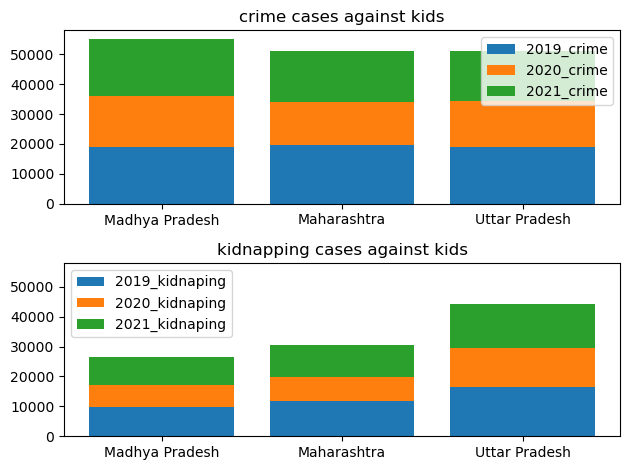

In [69]:
fig,ax = plt.subplots(2,1,sharey=True)
ax[0].bar(ck_top['Name'],ck_top['2019_crime'],label='2019_crime')
ax[0].bar(ck_top['Name'],ck_top['2020_crime'],bottom =ck_top['2019_crime'],label='2020_crime')
ax[0].bar(ck_top['Name'],ck_top['2021_crime'],bottom =ck_top['2019_crime'] + ck_top['2020_crime'],label='2021_crime')
ax[0].legend()
ax[0].set_title("crime cases against kids")
ax[0].set_xticklabels(ck_top['Name'])
ax[1].bar(ck_top['Name'],ck_top['2019_kidnaping'],label='2019_kidnaping')
ax[1].bar(ck_top['Name'],ck_top['2020_kidnaping'],bottom =ck_top['2019_kidnaping'],label='2020_kidnaping')
ax[1].bar(ck_top['Name'],ck_top['2021_kidnaping'],bottom =ck_top['2019_kidnaping'] + ck_top['2020_kidnaping'],label='2021_kidnaping')
ax[1].legend()
ax[1].set_title("kidnapping cases against kids")
ax[1].set_xticklabels(ck_top['Name'])
plt.tight_layout()
plt.show()

From above we can see that crime on kids is highest in Madhya Pradesh followed by Maharashtra and UP
Whereas the Kidnapping cases are opposite where the UP tops in cases for each year